# Perth House Prices

__by Dauren Tursynbek__

This project's aim is to predict house prices in Perth, Australia. The dataset contains information about houses and their price in Perth. 

In [189]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
pd.pandas.set_option('display.max_columns', None)

%matplotlib inline

In [190]:
#import the dataset
df=pd.read_csv("all_perth_310121.csv")

In [191]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [192]:
df.shape

(33656, 19)

The dataset contains 33656 rows and 19 columns. 

In [193]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

Dependent variable 'PRICE' has index 2. The column 'POSTCODE' seems irrelevant for price prediction. 

In [194]:
df.dtypes

ADDRESS              object
SUBURB               object
PRICE                 int64
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
BUILD_YEAR          float64
CBD_DIST              int64
NEAREST_STN          object
NEAREST_STN_DIST      int64
DATE_SOLD            object
POSTCODE              int64
LATITUDE            float64
LONGITUDE           float64
NEAREST_SCH          object
NEAREST_SCH_DIST    float64
NEAREST_SCH_RANK    float64
dtype: object

# EDA

In [195]:
#Take info about Price
df['PRICE'].describe().astype(int)

count      33656
mean      637072
std       355825
min        51000
25%       410000
50%       535500
75%       760000
max      2440000
Name: PRICE, dtype: int32

In average, a house in Perth costs 637072 AUD. The highest price for a house in Perth is 2440000 AUD, the cheapest is 51000 AUD.
Moreover, without even plotting the histogram or KDE we can clearly see that the feature is skewed as the mean and median i.e.25% values are different, also we can see that 75% of the prices values are between 51000 - 760000 but the maximum value is way of the scale than it should be.

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

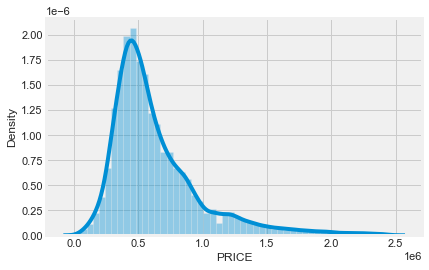

In [196]:
sns.distplot(df.PRICE)

In [197]:
#skewness and kurtosis

print(f"Skewness: {df['PRICE'].skew()}")
print(f"Kurtosis: {df['PRICE'].kurt()}")

Skewness: 1.7830863500470069
Kurtosis: 3.9694140142803076


It is badly skewed. Therefore, data transformation must be applied.

In [198]:
sub = pd.DataFrame(columns=['SUBURB_AVG', 'SUBURB_COUNT'])
sub['SUBURB_AVG']=df.groupby('SUBURB')['PRICE'].mean()
sub['SUBURB_COUNT']=df.groupby('SUBURB')['PRICE'].count()
print(sub.sort_values(by=['SUBURB_AVG']).astype(int))
print(sub.sort_values(by=['SUBURB_COUNT']).astype(int))

                     SUBURB_AVG  SUBURB_COUNT
SUBURB                                       
Kwinana Beach            170000             1
Kwinana Town Centre      185598            34
Armadale                 246611            63
Haynes                   265126           115
Medina                   271981           119
...                         ...           ...
Cottesloe               1646283            69
Nedlands                1647441           104
City Beach              1654765           156
Peppermint Grove        1793548            41
Dalkeith                1951092            73

[321 rows x 2 columns]
                 SUBURB_AVG  SUBURB_COUNT
SUBURB                                   
Kwinana Beach        170000             1
Munster             1030000             1
Naval Base          1408000             1
Welshpool            465000             1
Wangara             1375000             1
...                     ...           ...
Carramar             524224           208


The most expensive suburb is Dalkeith with the mean price 1951092 AUD and the cheapest is Kwinana Beach with 170000 AUD. Houses in the most popular suburbs cost between 381613 AUD and 894611 AUD.

# Relationship between selected features

### Relation with numerical variables

In [199]:
#there are significantly less houses with land are bigger than 40000. Therefore they can be considered as outliers
#and hence are irrelevant
index=0
for value in df['LAND_AREA']:
    if value>40000:
        df['LAND_AREA'][index]=df['LAND_AREA'].mean()
    index=index+1

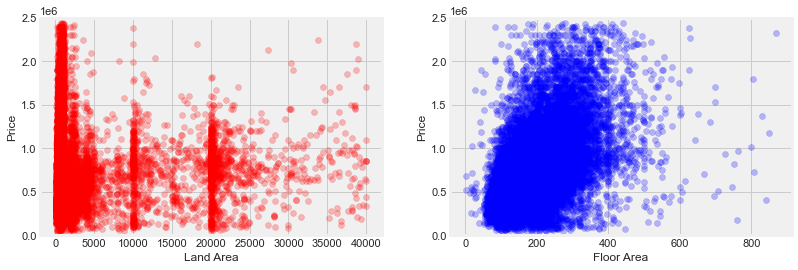

In [200]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(df['LAND_AREA'], df['PRICE'], c='red', alpha=0.25)
plt.xlabel('Land Area')
plt.ylabel('Price')
plt.ylim(0,2500000)

plt.subplot(1, 2, 2)
plt.scatter(df['FLOOR_AREA'], df['PRICE'], c='blue', alpha=0.25)
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.ylim(0,2500000)
plt.show()

The graphs show poor relationship between land area and price, floor area and price. Still, the first graph shows clear grouping by land area of less than 5000, of 10000, and of 20000. 

### Relation with categorical variables

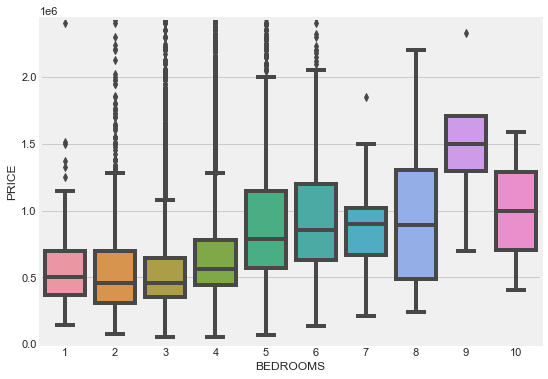

In [201]:
plt.figure(figsize=(8, 6))
var = 'BEDROOMS'
data = pd.concat([df['PRICE'], df[var]], axis=1)
_ = sns.boxplot(x=var, y='PRICE', data=data)
plt.axis(ymin=0, ymax=df['PRICE'].max())
plt.show()

The boxplot shows that the more number of bedrooms, higher the price.

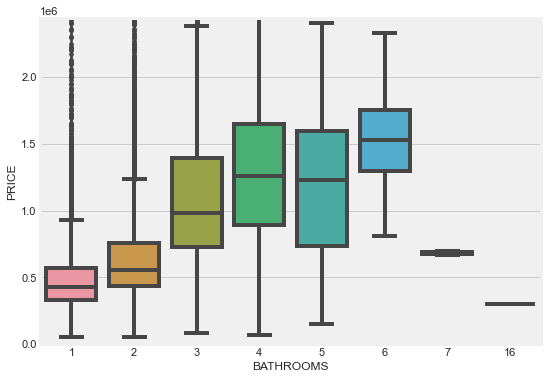

In [202]:
plt.figure(figsize=(8, 6))
var = 'BATHROOMS'
data = pd.concat([df['PRICE'], df[var]], axis=1)
_ = sns.boxplot(x=var, y='PRICE', data=data)
plt.axis(ymin=0, ymax=df['PRICE'].max())
plt.show()

The boxplot shows the same result as for number of bedrooms that the more number of bathrooms, higher the price. 

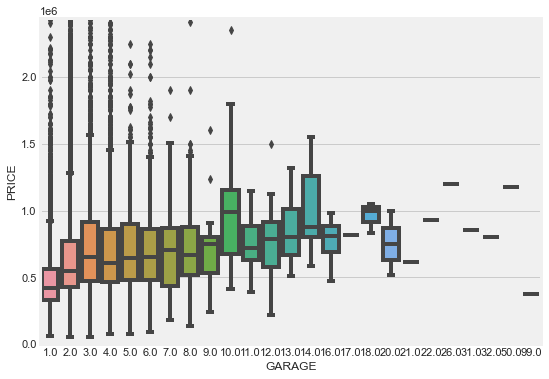

In [203]:
plt.figure(figsize=(8, 6))
var = 'GARAGE'
data = pd.concat([df['PRICE'], df[var]], axis=1)
_ = sns.boxplot(x=var, y='PRICE', data=data)
plt.axis(ymin=0, ymax=df['PRICE'].max())
plt.show()

The boxplot shows that the more number of garages the house has, higher the price.

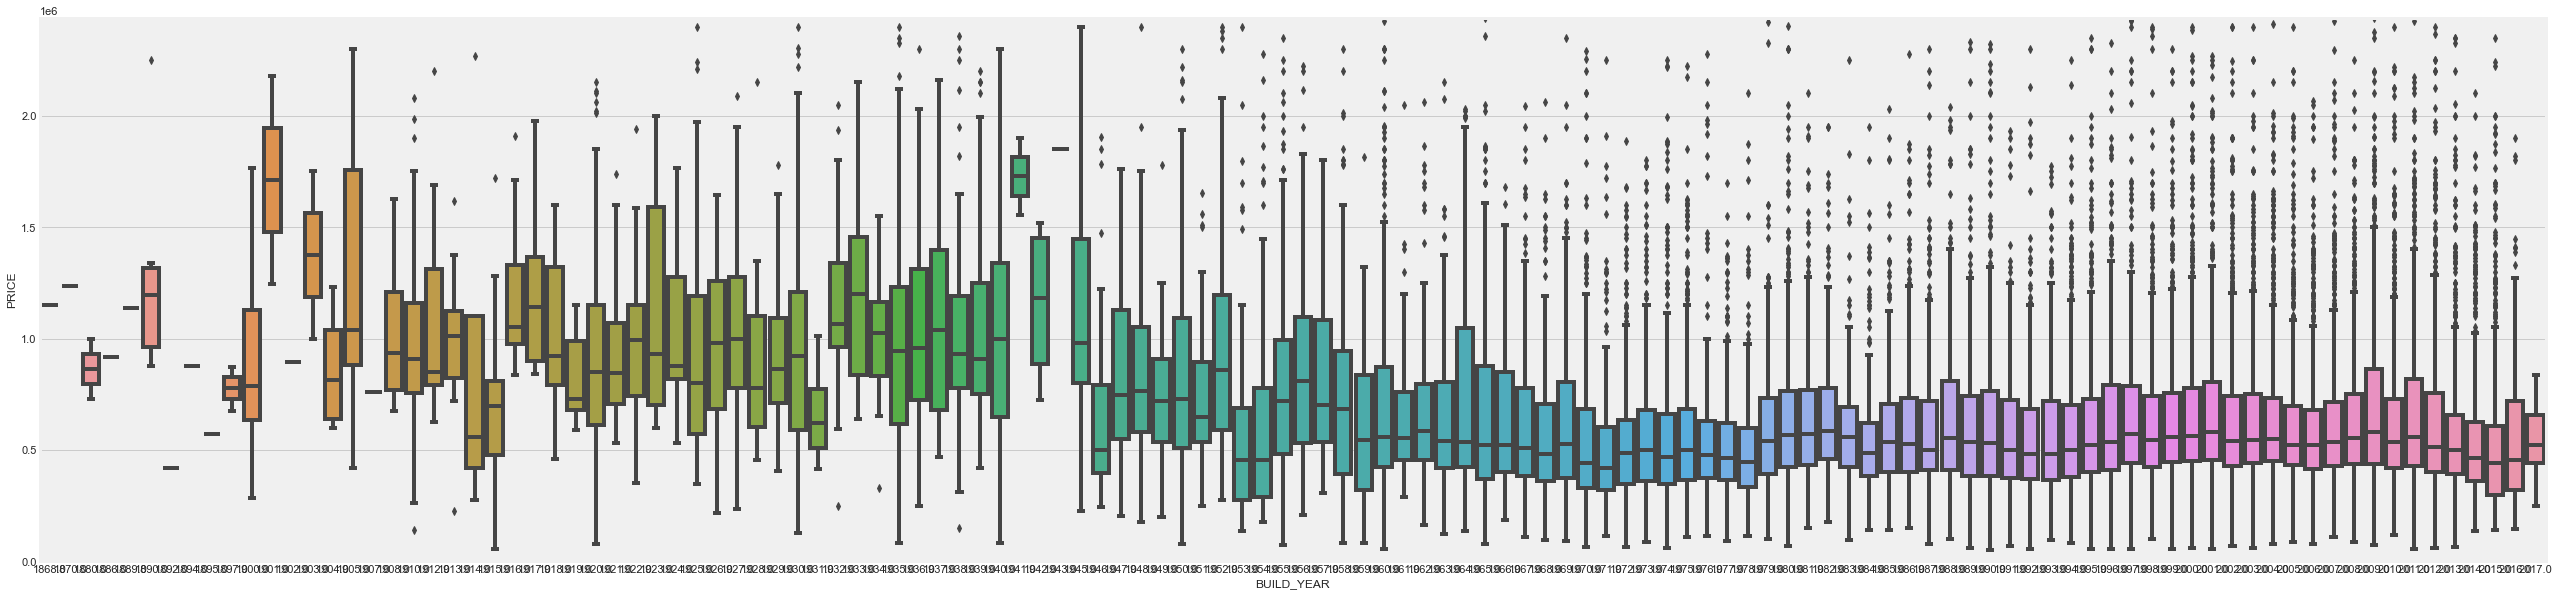

In [204]:
plt.figure(figsize=(40, 10))
var = 'BUILD_YEAR'
data = pd.concat([df['PRICE'], df[var]], axis=1)
_ = sns.boxplot(x=var, y='PRICE', data=data)
plt.axis(ymin=0, ymax=df['PRICE'].max())
plt.show()

Though we can never quantify this for sure, but more recently built houses will have a low price.

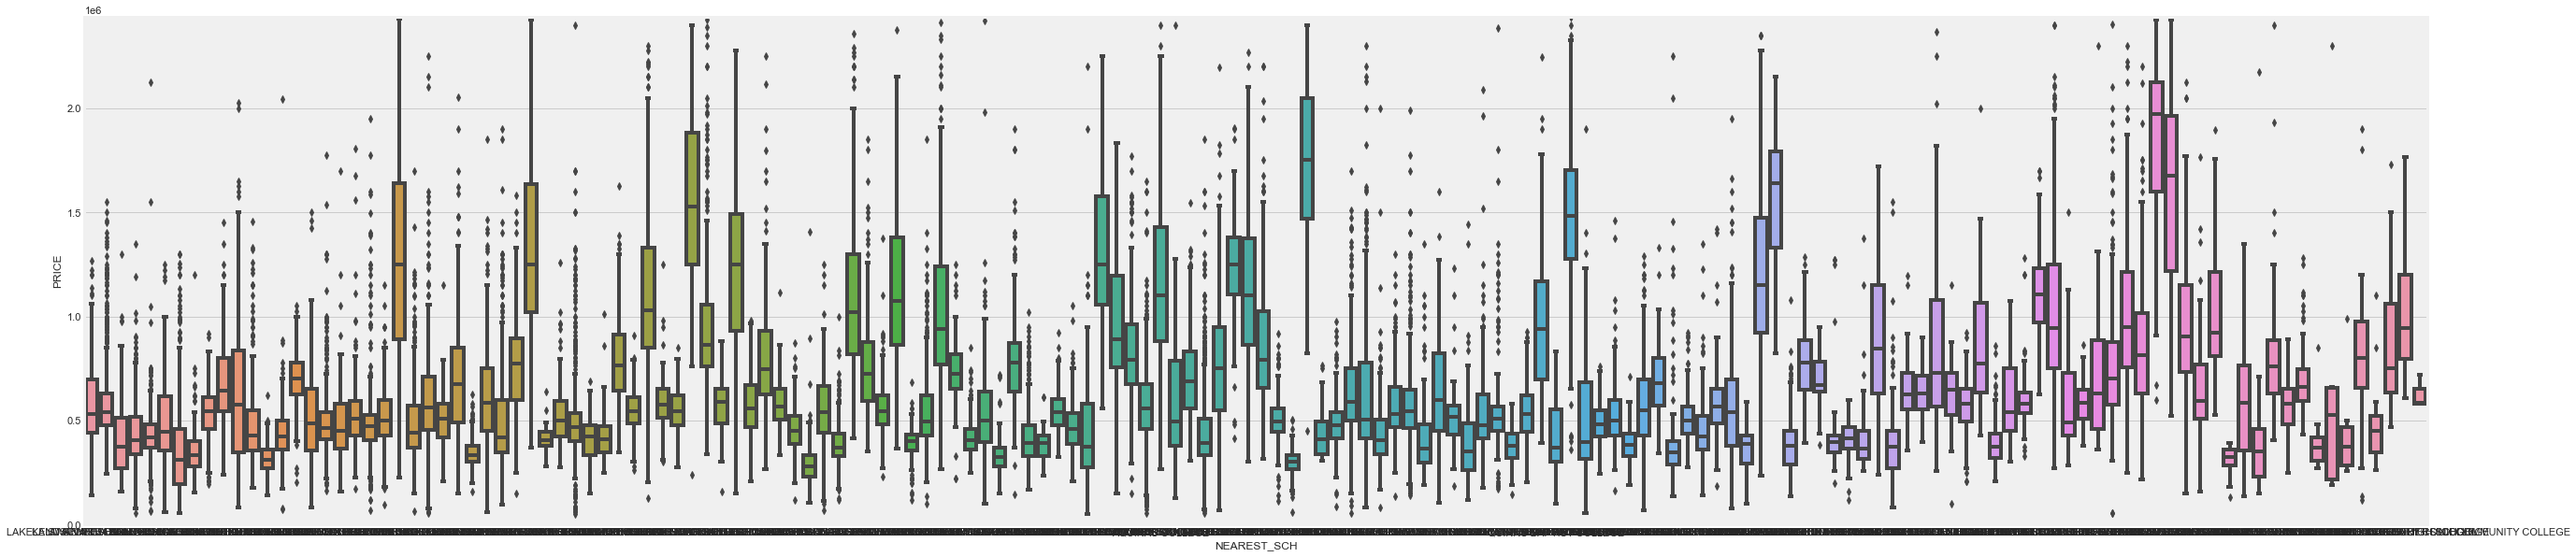

In [205]:
plt.figure(figsize=(40, 10))
var = 'NEAREST_SCH'
data = pd.concat([df['PRICE'], df[var]], axis=1)
_ = sns.boxplot(x=var, y='PRICE', data=data)
plt.axis(ymin=0, ymax=df['PRICE'].max())
plt.show()

Soom school neighborhoods have significantly higher price. 

Conclusion: 
All boxplots show that there are too many outliers for smaller houses. The variables considered above are stable only for bigger houses. 

## Analysis of other variables

### Correlation matrix Heatmap

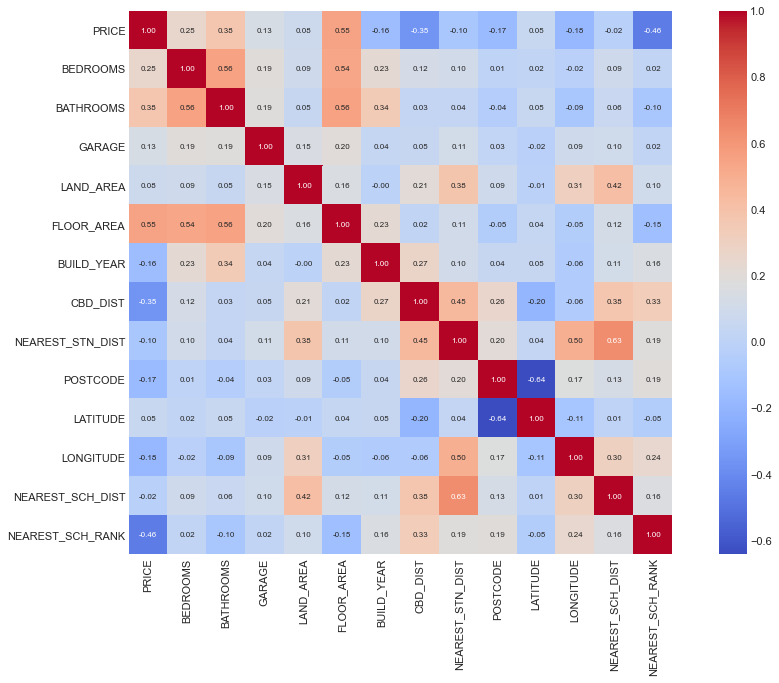

In [206]:
plt.figure(figsize=(15, 10))
corrmat = df.drop('ADDRESS', 1).corr()
sns.heatmap(corrmat, vmax=1.0, square=True, fmt='.2f', 
            annot=True, cmap='coolwarm', annot_kws={'size': 8});

Correlation matrix Heatmap shows that significant correlation with price exists only in nearest school rank, floor area, number of bedrooms, and number of bathrooms.

In [207]:
# SalePrice scatter plot with highly correlated features

<Figure size 720x576 with 0 Axes>

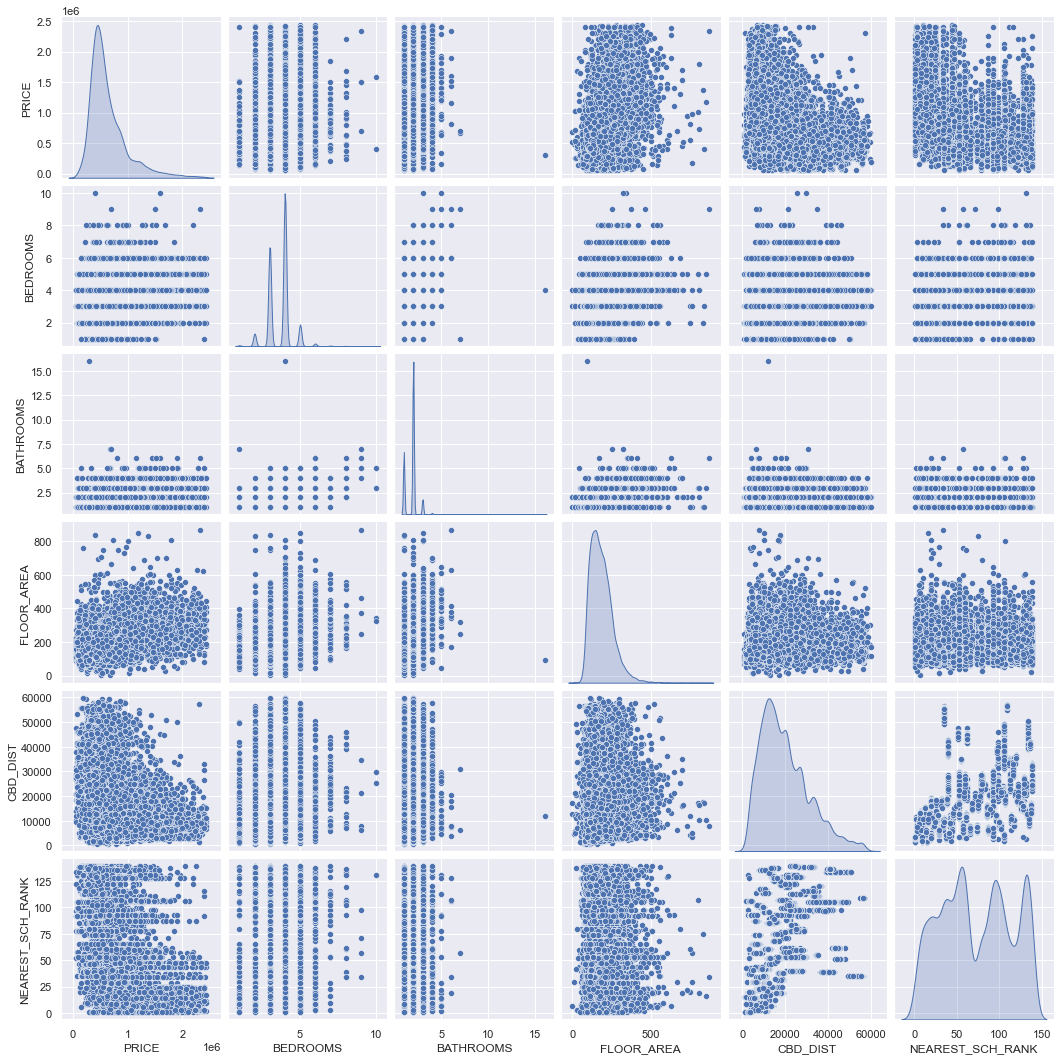

In [208]:
plt.figure(figsize=(10, 8))

sns.set()
cols = ['PRICE', 'BEDROOMS', 'BATHROOMS', 'FLOOR_AREA', 'CBD_DIST', 'NEAREST_SCH_RANK']
_ = sns.pairplot(df[cols], size = 2.5, diag_kind='kde')
plt.show()

### Missing data

In [209]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

a = pd.DataFrame({
    'features': features_with_na,
    'Total': [df[i].isnull().sum() for i in features_with_na],
    'Missing_PCT': [np.round(df[i].isnull().sum()/ df.shape[0], 4) for i in features_with_na]
}).sort_values(by='Missing_PCT', ascending=False).reset_index(drop=True)
a.style.background_gradient(cmap='Reds')

,features,Total,Missing_PCT
0,NEAREST_SCH_RANK,10952,0.325400
1,BUILD_YEAR,3155,0.093700
2,GARAGE,2478,0.073600


### Examining Missing Features

In [210]:
df['BUILD_YEAR'].value_counts()

2000.0    965
2006.0    961
2004.0    907
2002.0    889
2003.0    889
         ... 
1907.0      1
1886.0      1
1889.0      1
1943.0      1
1868.0      1
Name: BUILD_YEAR, Length: 124, dtype: int64

In [211]:
df[df['BUILD_YEAR'].isnull()][['DATE_SOLD','BUILD_YEAR']]

,DATE_SOLD,BUILD_YEAR
27,08-2018\r,NaN
33,10-2017\r,NaN
63,08-2014\r,NaN
81,01-2019\r,NaN
82,12-2008\r,NaN
...,...,...
33630,07-2018\r,NaN
33641,06-2020\r,NaN
33652,02-2017\r,NaN
33653,02-2017\r,NaN


In [212]:
df['GARAGE'].unique()

array([ 2.,  1.,  3.,  8.,  6.,  4., nan,  5.,  7.,  9., 10., 12., 32.,
       14., 16., 11., 13., 17., 18., 21., 20., 99., 26., 22., 50., 31.])

In [213]:
df[df['GARAGE'].isnull()][['FLOOR_AREA', 'GARAGE']]

,FLOOR_AREA,GARAGE
58,150,NaN
66,180,NaN
81,185,NaN
125,126,NaN
135,86,NaN
...,...,...
33558,112,NaN
33566,109,NaN
33568,225,NaN
33582,210,NaN


In [214]:
df[df['NEAREST_SCH_RANK'].isnull()][['NEAREST_SCH', 'NEAREST_SCH_DIST','NEAREST_SCH_RANK']]

,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
3,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,KIARA COLLEGE,1.514922,NaN
5,ARMADALE SENIOR HIGH SCHOOL,1.227219,NaN
6,DALE CHRISTIAN SCHOOL,2.485731,NaN
...,...,...,...
33629,ALTA-1,0.475902,NaN
33630,INTERNATIONAL SCHOOL OF WESTERN AUSTRALIA,0.761199,NaN
33642,ST FRANCIS' SCHOOL,0.958426,NaN
33647,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


### Considering effect of Outliers

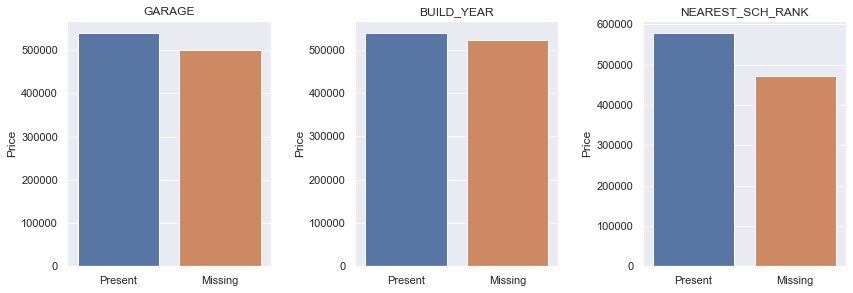

In [215]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features_with_na, 1):
    plt.subplot(5, 5, i)
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # calculate the median SalePrice where the information is missing or present
    temp = data.groupby(feature)['PRICE'].median()
    _ = sns.barplot(x=temp.index, y=temp.values)
    plt.title(feature)
    plt.xlabel("")
    plt.xticks([0, 1], ["Present", "Missing"])
    plt.ylabel("Price", rotation=90)
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

## Univariate analysis

For labelling a point as an outlier we need to define a threshold value that defines the datapoint as an outlier. We can do this bu standardizing the data.

In [216]:
saleprice_scaled = StandardScaler().fit_transform(df['PRICE'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.64710088]
 [-1.64429047]
 [-1.64148007]
 [-1.63726446]
 [-1.63726446]
 [-1.63585925]
 [-1.63585925]
 [-1.63585925]
 [-1.63585925]
 [-1.63304884]]

outer range (high) of the distribution:
[[4.98264928]
 [5.01075335]
 [5.02480539]
 [5.02480539]
 [5.02480539]
 [5.02480539]
 [5.02480539]
 [5.03885742]
 [5.05853027]
 [5.06696149]]


How 'PRICE' looks with her new clothes:

+ Low range values are similar and not too far from 0.
+ High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

Let's examine the outliers present in continuous features after applying a log transformation

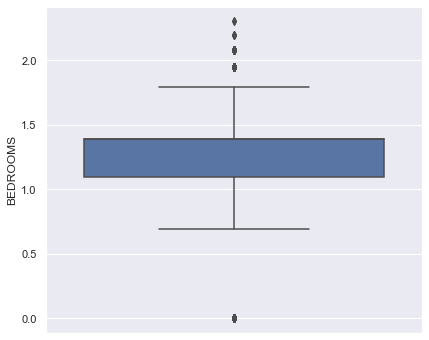

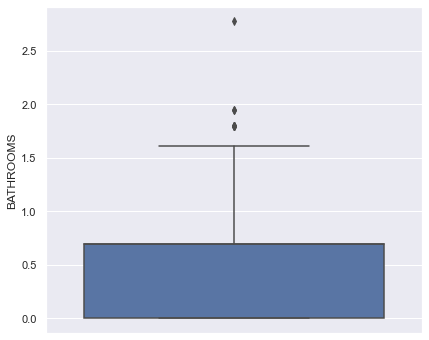

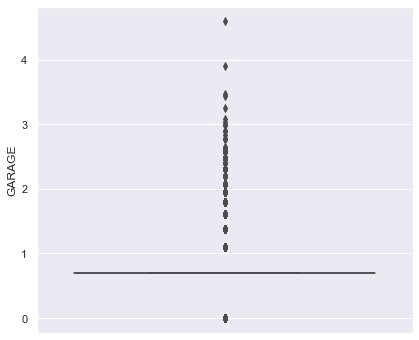

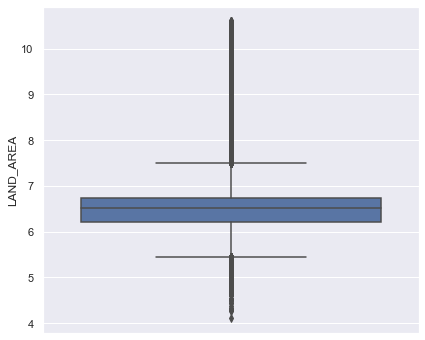

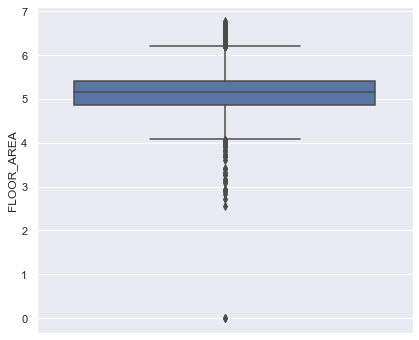

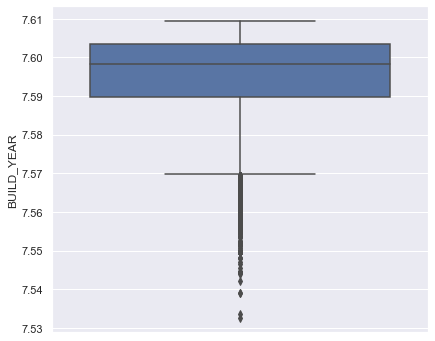

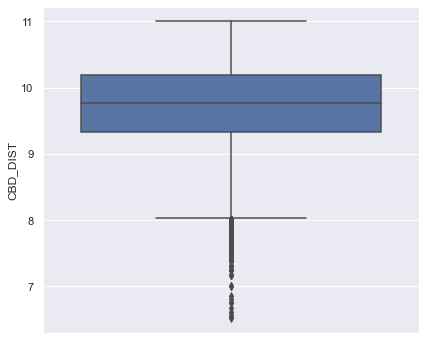

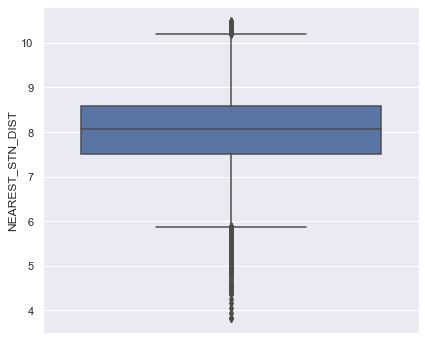

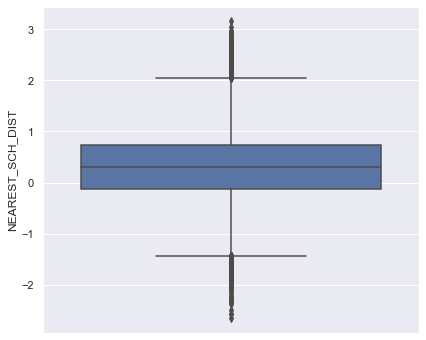

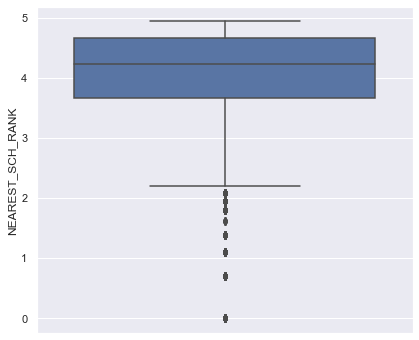

In [250]:
data = df.copy()
# price = np.log(df['PRICE'])

for i, feature in enumerate(numerical_features, 1):
    
    data = df[feature].copy()
    if 0 in data.unique(): # as log 0 is undefined
        continue
    elif feature!= 'LONGITUDE' and feature!='LATITUDE' and feature!='POSTCODE':
        data = np.log(data)   
        data.name = feature
        _ = plt.figure(figsize=(6, 6))
        _ = sns.boxplot(y=data)
    
plt.show()

__Observations:__
+ There are plenty of outliers present even after log transformation in every featufres.
+ These outliers will most likely interfere during the model building process.
+ We will need to handle them during feature engineering
+ There are a few techniques for outlier handling:
1. Outlier removal
2. Treating outliers as missing values
3. Top / bottom / zero coding
4. Discretisation

## Bivariate analysis

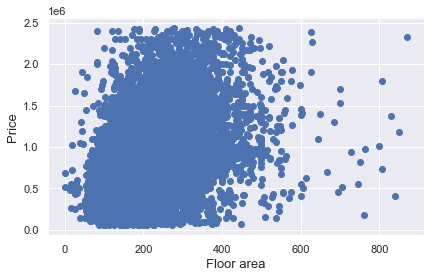

In [233]:
fig, ax = plt.subplots()
ax.scatter(x = df['FLOOR_AREA'], y = df['PRICE'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Floor area', fontsize=13)
plt.show()

We can see at the right few values that are insignificant in comparison to the left side of the plot. These values are huge oultliers. Therefore, we can safely delete them.

## Discrete numerical values

In [251]:
discrete_features

['BEDROOMS', 'BATHROOMS']

In [253]:
df[discrete_features].head()

,BEDROOMS,BATHROOMS
0,4,2
1,3,2
2,3,1
3,2,1
4,4,1


Relationship between discrete features and Price:

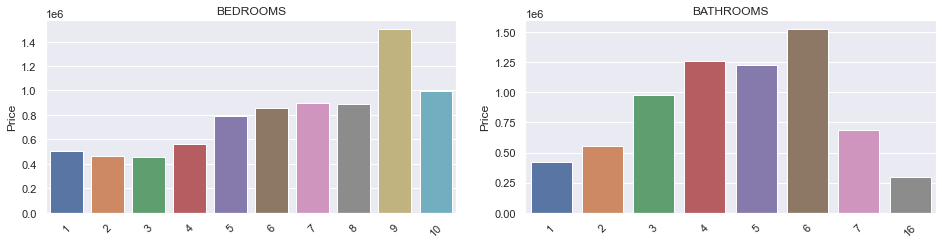

In [256]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(discrete_features, 1):
    plt.subplot(6, 3, i)
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    
    # calculate the median SalePrice where the information is missing or present
    temp = data.groupby(feature)['PRICE'].median()
    _ = sns.barplot(x=temp.index, y=temp.values)
    plt.title(feature)
    plt.xlabel("")
    plt.ylabel("Price", rotation=90)
    plt.xticks(rotation=45)
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

## Continuous numerical values

In [258]:
print(f"Number of Continuous numerical features: {len(continuous_num_features)}")

Number of Continuous numerical features: 11


In [261]:
continuous_num_features

['GARAGE',
 'LAND_AREA',
 'FLOOR_AREA',
 'BUILD_YEAR',
 'CBD_DIST',
 'NEAREST_STN_DIST',
 'POSTCODE',
 'LATITUDE',
 'LONGITUDE',
 'NEAREST_SCH_DIST',
 'NEAREST_SCH_RANK']

In [263]:
df[continuous_num_features].head()

,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,2.0,600,160,2003.0,18300,1800,6164,-32.115900,115.842450,0.828339,NaN
1,2.0,351,139,2013.0,26900,4900,6167,-32.193470,115.859553,5.524324,129.0
2,1.0,719,86,1979.0,22600,1900,6111,-32.120578,115.993579,1.649178,113.0
3,2.0,651,59,1953.0,17900,3600,6056,-31.900547,116.038009,1.571401,NaN
4,2.0,466,131,1998.0,11200,2000,6054,-31.885790,115.947780,1.514922,NaN


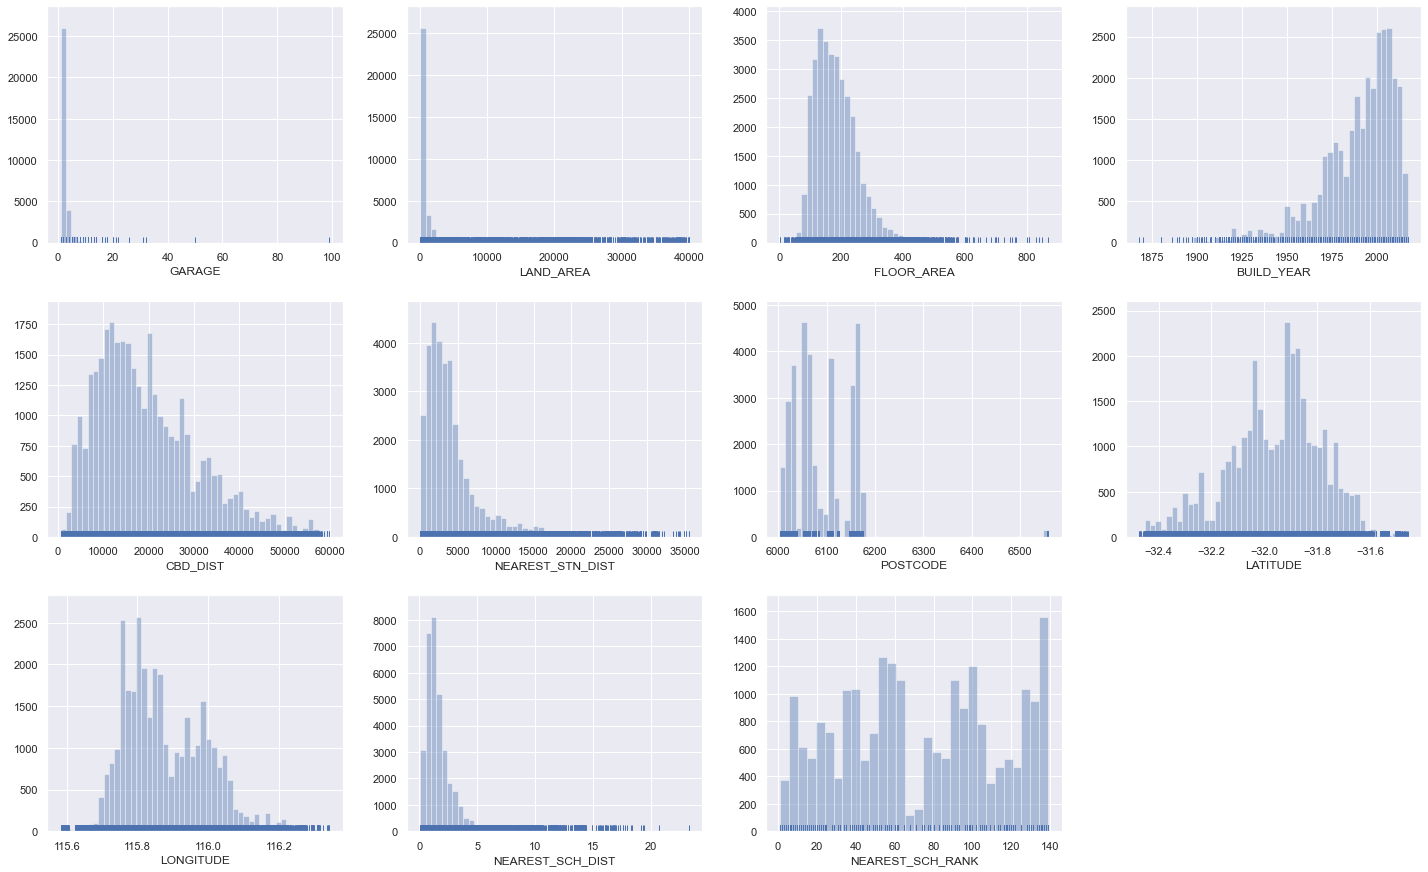

In [264]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(continuous_num_features, 1):
    plt.subplot(5, 4, i)
#     _ = sns.distplot(train[feature], kde_kws={'bw': 1.05})    
    _ = sns.distplot(df[feature], kde=False, rug=True)
    
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

__Observations:__
+ For starters we can see that the most of the continuous features don't follow a normal distribution.
+ Some of the features are heavily skewed so we would have to perform some transformation to them.

### Performing Logarithmic transformation to the data

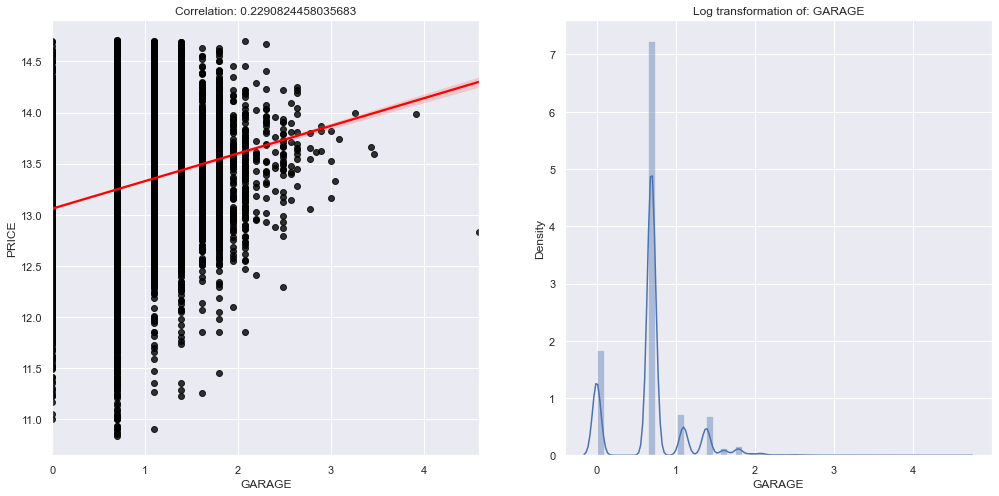

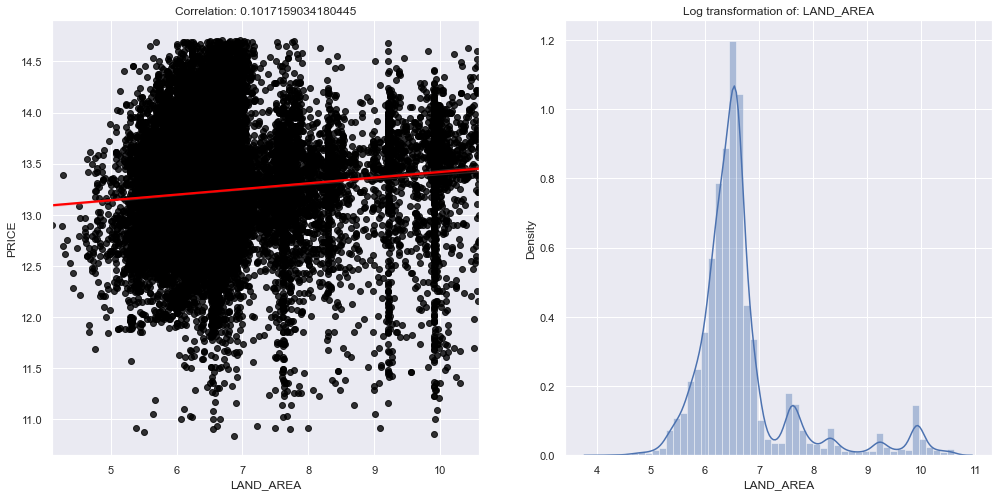

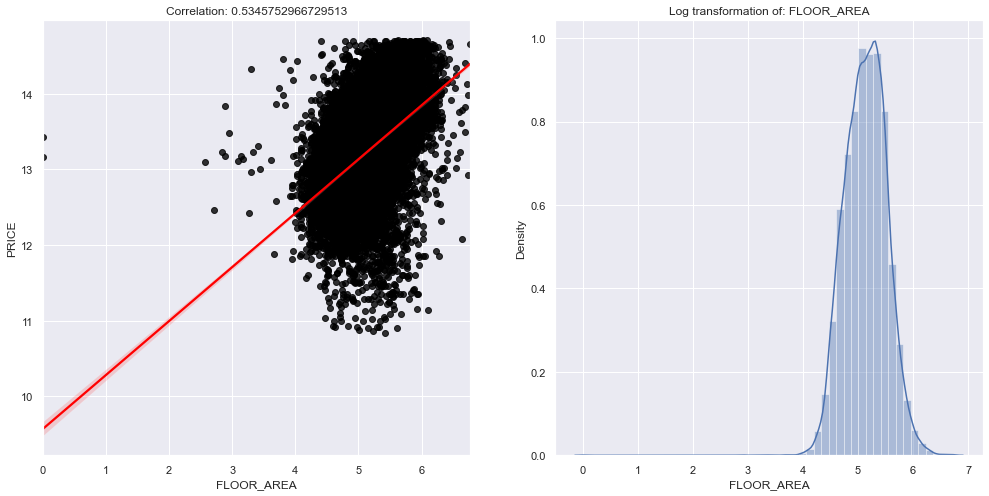

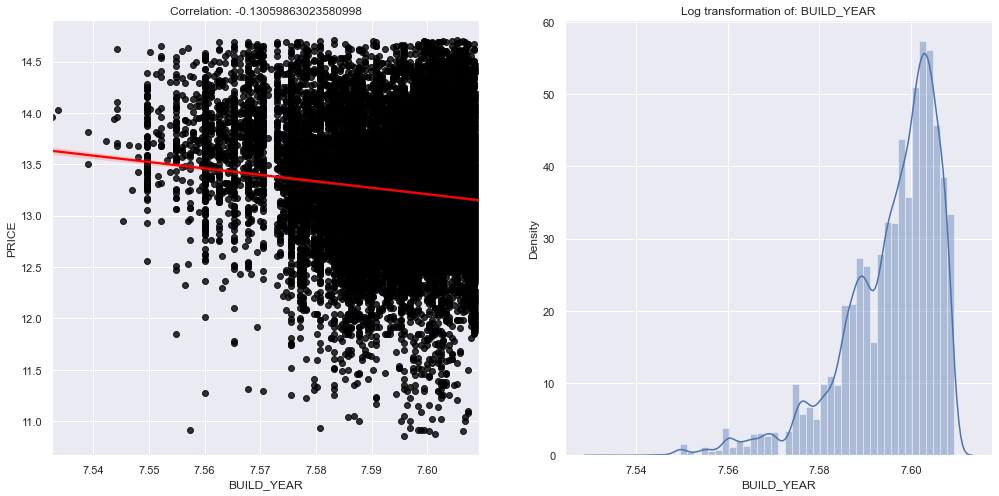

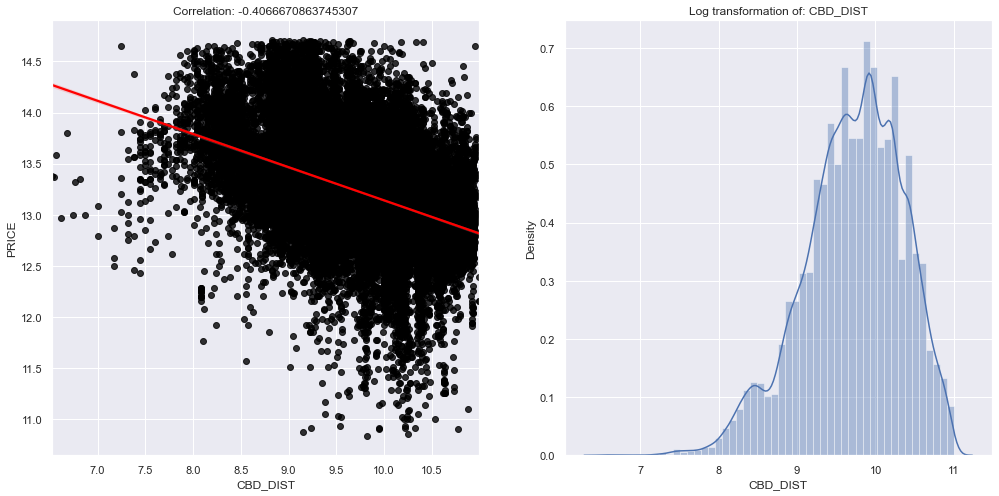

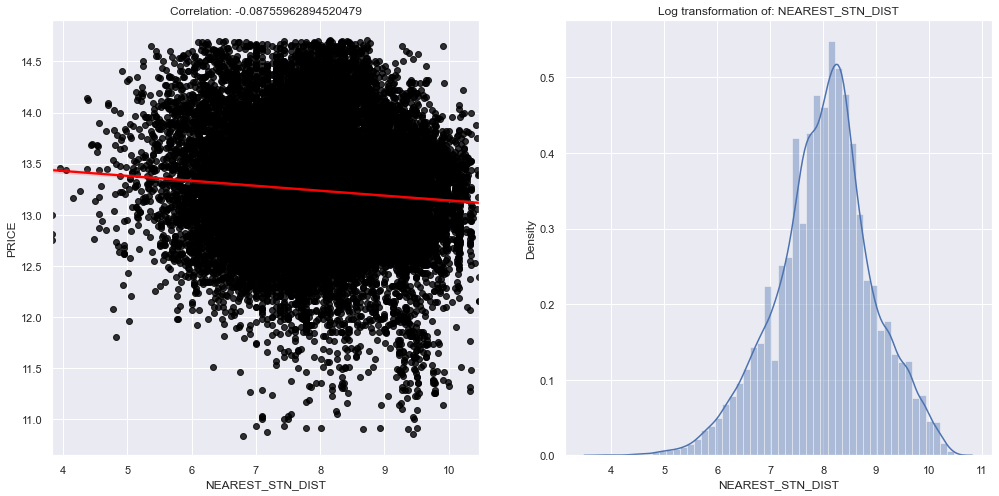

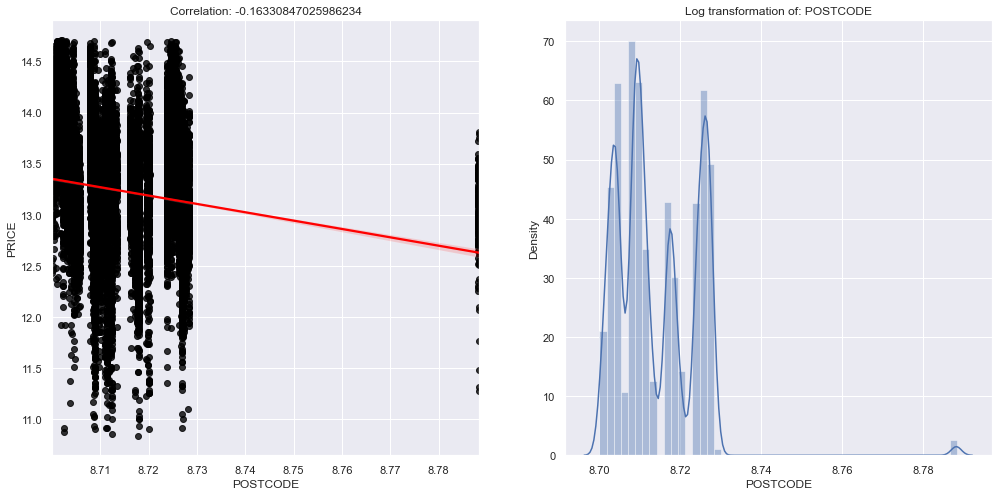

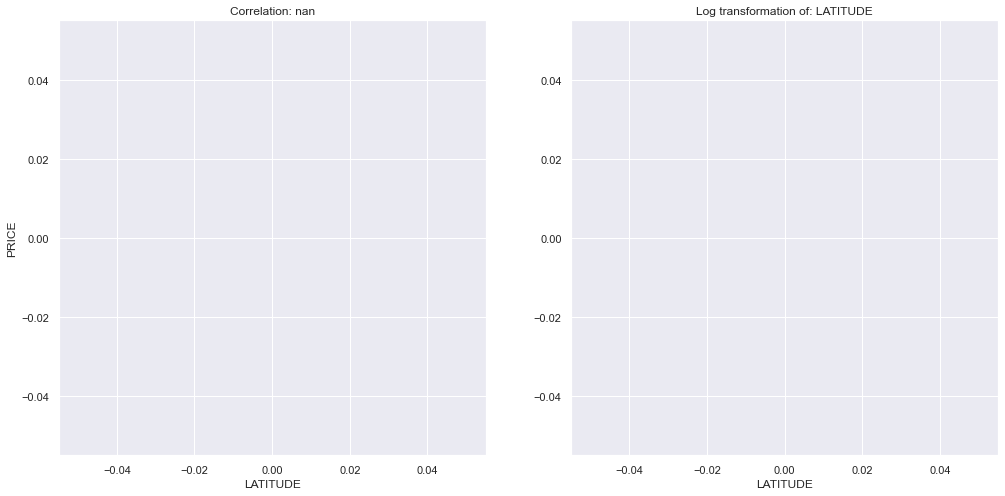

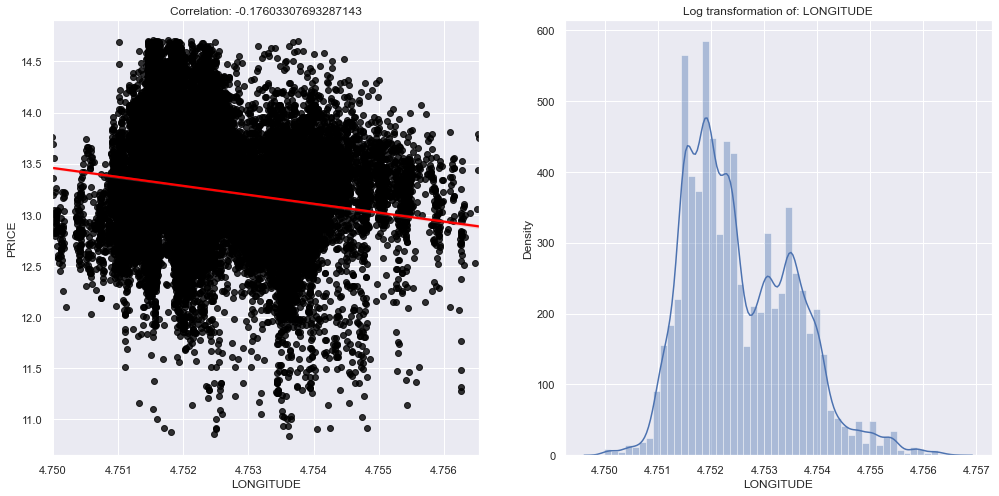

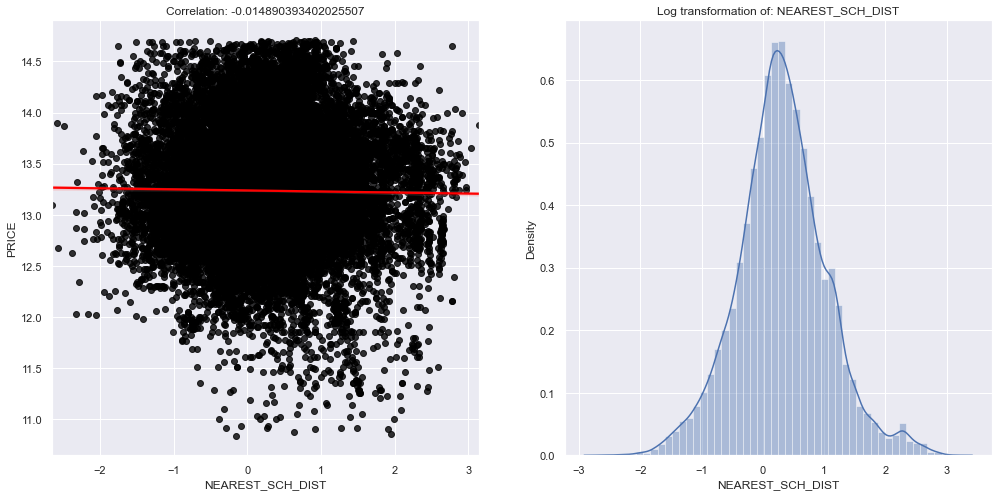

In [266]:

data = df.copy()

sale_price = np.log(df['PRICE'])

for i, feature in enumerate(continuous_num_features[:-1], 1):
    data = df[feature].copy()
    
    if 0 in data.unique(): # as log 0 is undefinedz
        continue
    else:
        data = np.log(data)    
        data.name = feature
        _ = plt.figure(figsize=(15, 8))
        plt.subplot(1, 2, 1)
        sns.regplot(data, sale_price, fit_reg=True,
                   scatter_kws={"color": "black"}, line_kws={"color": "red"}).set_title(f"Correlation: {data.corr(sale_price)}")
        plt.subplot(1, 2, 2)
        sns.distplot(data).set_title(f"Log transformation of: {feature}")
plt.show()

__Observations:__

+ Though the data has been transformed we can see some irregulaties for eg. LAND_AREA looking at the scatter we can see that for some same values the PRICE increases. We can see that there's not much of correlation between the two
+ log(FLOOR_AREA) is heavily correlated with PRICE
+ We were not able to take log of other continuous features as log(0) is undefined

## Categorical variables

In [267]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
print(f"Number of categorical feature: {len(categorical_features)}")

Number of categorical feature: 5


In [269]:
categorical_features

['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH']

In [270]:
df[categorical_features].head()

,ADDRESS,SUBURB,NEAREST_STN,DATE_SOLD,NEAREST_SCH
0,1 Acorn Place,South Lake,Cockburn Central Station,09-2018\r,LAKELAND SENIOR HIGH SCHOOL
1,1 Addis Way,Wandi,Kwinana Station,02-2019\r,ATWELL COLLEGE
2,1 Ainsley Court,Camillo,Challis Station,06-2015\r,KELMSCOTT SENIOR HIGH SCHOOL
3,1 Albert Street,Bellevue,Midland Station,07-2018\r,SWAN VIEW SENIOR HIGH SCHOOL
4,1 Aman Place,Lockridge,Bassendean Station,11-2016\r,KIARA COLLEGE


In [275]:
pd.DataFrame({
    "features": categorical_features,
    "Nonique": [df[feature].nunique() for feature in categorical_features]             
             })

,features,Nonique
0,ADDRESS,33566
1,SUBURB,321
2,NEAREST_STN,68
3,DATE_SOLD,350
4,NEAREST_SCH,160
